In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [2]:
#importing .xlsx into jupyter notebook

igr= pd.read_excel(r"C:\Users\USER\Documents\Instagram.xlsx")

In [3]:
igr

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0          3920       2586           1028           619          56     98   
1          5394       2727           1838          1174          78    194   
2          4021       2085           1188             0         533     41   
3          4528       2700            621           932          73    172   
4          2518       1704            255           279          37     96   
..          ...        ...            ...           ...         ...    ...   
94         4082       2195           1248           541          36    135   
95         5394       2275           2975            45          65     61   
96         2766       2541            116            51           9     40   
97         3924       2244           1278           326          34    139   
98         3015       2034            771           115          41     52   

    Comments  Shares  Likes  Profile Visits  Follows  \
0          9       5    162              35        2   
1          7      14    224              48       10   
2         11       1    131              62       12   
3         10       7    213              23        8   
4          5       4    123               8        0   
..       ...     ...    ...             ...      ...   
94        11       5    175              19        6   
95        19       6    147              69        6   
96        10       4    114              11        6   
97        11       3    151              19        2   
98        11       4     92               9        2   

                                              Caption  \
0   Here are some of the most important data visua...   
1   Here are some of the best data science project...   
2   Learn how to train a machine learning model an...   
3   Here’s how you can write a Python program to d...   
4   Plotting annotations while visualizing your da...   
..                                                ...   
94  Deep learning is a subset of machine learning ...   
95  You must have heard or invested in any cryptoc...   
96  Here are all the programming languages that Fa...   
97  Here are some of the most popular data science...   
98  Here’s how Amazon uses your data as an e-comme...   

                                             Hashtags  
0   #finance #money #business #investing #investme...  
1   #healthcare #health #covid #data #datascience ...  
2   #data #datascience #dataanalysis #dataanalytic...  
3   #python #pythonprogramming #pythonprojects #py...  
4   #datavisualization #datascience #data #dataana...  
..                                                ...  
94  #deeplearning #machinelearning #artificialinte...  
95  #data #datascience #dataanalysis #dataanalytic...  
96  #programming #coding #programmer #python #deve...  
97  #data #datascience #dataanalysis #dataanalytic...  
98  #data #datascience #dataanalysis #dataanalytic...  

[99 rows x 13 columns]

In [4]:
ig_dr= pd.DataFrame(igr)
#converting to DataFrame

In [5]:
ig_dr.isnull().sum()
#depicts null values

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [6]:
ig= ig_dr.dropna()

In [7]:
ig.describe()

Impressions    From Home  From Hashtags  From Explore   From Other  \
count     99.000000    99.000000      99.000000     99.000000    99.000000   
mean    4644.131313  2267.808081    1738.252525    417.040404   137.242424   
std     2291.474570   567.121422    1800.561054    511.751971   184.376118   
min     1941.000000  1179.000000     116.000000      0.000000     9.000000   
25%     3225.000000  1960.000000     655.000000    124.500000    36.000000   
50%     3990.000000  2195.000000    1248.000000    249.000000    69.000000   
75%     5172.500000  2577.500000    2222.000000    496.000000   157.500000   
max    16062.000000  4137.000000   11817.000000   2355.000000  1115.000000   

            Saves   Comments    Shares       Likes  Profile Visits     Follows  
count   99.000000  99.000000  99.00000   99.000000       99.000000   99.000000  
mean   126.909091   6.959596   8.00000  160.333333       38.424242   11.979798  
std    107.821100   3.610979   7.39829   64.883884       58.915555   18.838725  
min     22.000000   0.000000   0.00000   72.000000        4.000000    0.000000  
25%     61.000000   5.000000   3.00000  116.500000       14.000000    2.000000  
50%    104.000000   7.000000   6.00000  150.000000       21.000000    6.000000  
75%    144.000000   9.000000  11.50000  188.500000       36.500000   11.000000  
max    668.000000  19.000000  41.00000  416.000000      347.000000  100.000000

In [8]:
ig.shape

(99, 13)

In [9]:
ig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     99 non-null     int64 
 1   From Home       99 non-null     int64 
 2   From Hashtags   99 non-null     int64 
 3   From Explore    99 non-null     int64 
 4   From Other      99 non-null     int64 
 5   Saves           99 non-null     int64 
 6   Comments        99 non-null     int64 
 7   Shares          99 non-null     int64 
 8   Likes           99 non-null     int64 
 9   Profile Visits  99 non-null     int64 
 10  Follows         99 non-null     int64 
 11  Caption         99 non-null     object
 12  Hashtags        99 non-null     object
dtypes: int64(11), object(2)
memory usage: 10.2+ KB


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Impressions From Home'}, xlabel='From Home', ylabel='Density'>

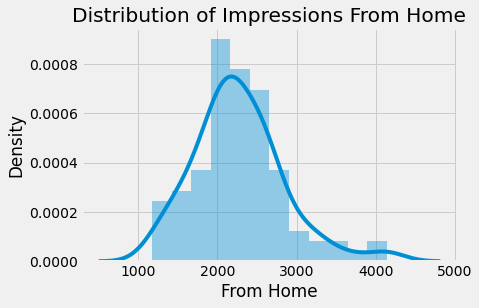

In [10]:
plt.Figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(ig['From Home'])

<AxesSubplot:title={'center':'Distribution of Impressions From Home'}, xlabel='From Home', ylabel='Count'>

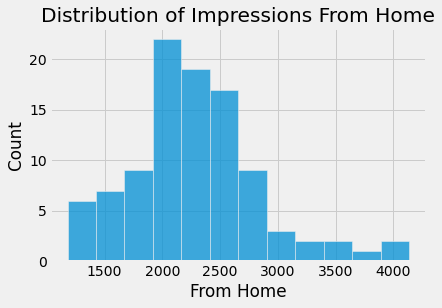

In [11]:
plt.Figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.histplot(ig['From Home'])

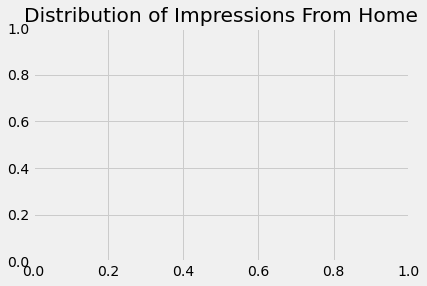

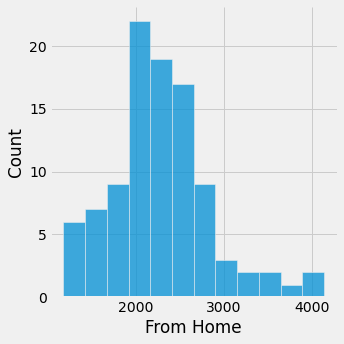

In [12]:
plt.Figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.displot(ig['From Home'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


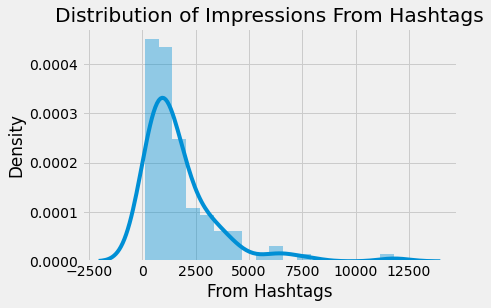

In [13]:
plt.Figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(ig['From Hashtags'])
plt.show()

In [14]:
home= ig['From Home'].sum()
hashtags= ig['From Hashtags'].sum()
explore= ig['From Explore'].sum()
other= ig['From Other'].sum()

Q= ['From Home', 'From Hashtags', 'From Explore', 'From Other']
R = [home, hashtags, explore, other]




In [15]:
ferst=  px.pie(ig, values= R, names= Q, title= 'Impressions on Instagram Posts From Various Sources', hole= 0.5)


In [16]:
ferst

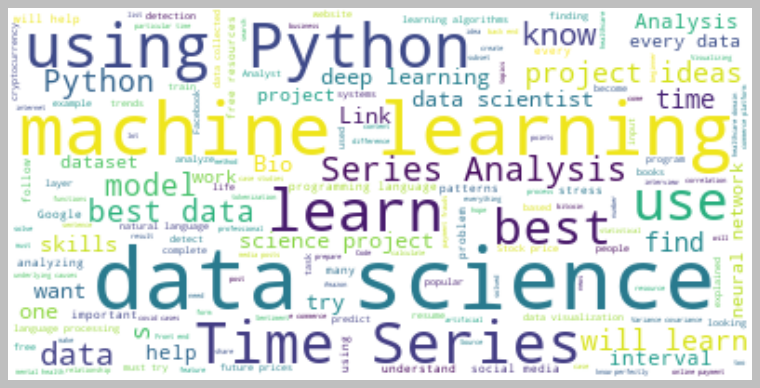

In [17]:
text = " ".join(_ for _ in ig.Caption)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.style.use('classic')

plt.figure( figsize=(12,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

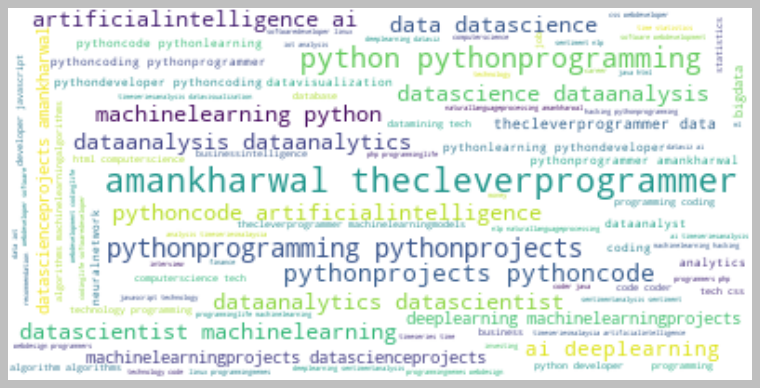

In [18]:
text = " ".join(_ for _ in ig.Hashtags)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure( figsize=(12,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

In [19]:
second= px.scatter(ig, y= 'Impressions', x= 'Likes', size= 'Likes', trendline= 'ols', title= 'Relationship Between Likes and Impressions')

In [20]:
second
#note the 'size'

In [21]:
third= px.scatter(ig, y= 'Impressions', x= 'Comments', size= 'Comments', trendline= 'ols', title= 'Relationship Between Comments and Impressions')

In [22]:
third

In [23]:
fourth= px.scatter(ig, y= 'Impressions', x= 'Shares', size= 'Shares', trendline= 'ols', title= 'Relationship Between Shares and Impressions')

In [24]:
fourth

In [26]:
ig.corr()

Impressions  From Home  From Hashtags  From Explore  \
Impressions        1.000000   0.603378       0.892682      0.498389   
From Home          0.603378   1.000000       0.247775      0.627201   
From Hashtags      0.892682   0.247775       1.000000      0.117056   
From Explore       0.498389   0.627201       0.117056      1.000000   
From Other         0.429227   0.253017       0.264955      0.299308   
Saves              0.625600   0.751234       0.321904      0.748407   
Comments           0.247201   0.404574       0.189838      0.033685   
Shares             0.476617   0.619734       0.250159      0.531271   
Likes              0.896277   0.753177       0.715534      0.537275   
Profile Visits     0.774393   0.318869       0.793107      0.143380   
Follows            0.804064   0.484809       0.678926      0.431809   

                From Other     Saves  Comments    Shares     Likes  \
Impressions       0.429227  0.625600  0.247201  0.476617  0.896277   
From Home         0.253017  0.751234  0.404574  0.619734  0.753177   
From Hashtags     0.264955  0.321904  0.189838  0.250159  0.715534   
From Explore      0.299308  0.748407  0.033685  0.531271  0.537275   
From Other        1.000000  0.248961 -0.082457  0.085182  0.336636   
Saves             0.248961  1.000000  0.137822  0.744239  0.761749   
Comments         -0.082457  0.137822  1.000000  0.182959  0.307451   
Shares            0.085182  0.744239  0.182959  1.000000  0.575453   
Likes             0.336636  0.761749  0.307451  0.575453  1.000000   
Profile Visits    0.437586  0.181447  0.205561  0.174526  0.586680   
Follows           0.588807  0.396706  0.104389  0.301200  0.638916   

                Profile Visits   Follows  
Impressions           0.774393  0.804064  
From Home             0.318869  0.484809  
From Hashtags         0.793107  0.678926  
From Explore          0.143380  0.431809  
From Other            0.437586  0.588807  
Saves                 0.181447  0.396706  
Comments              0.205561  0.104389  
Shares                0.174526  0.301200  
Likes                 0.586680  0.638916  
Profile Visits        1.000000  0.872862  
Follows               0.872862  1.000000

In [28]:
corr= ig.corr()
print(corr['Impressions'].sort_values(ascending= False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


In [32]:
#conversion rate for follows to profile visits
#usually expressed as a percentage
A= ig['Follows'].sum()
B= ig['Profile Visits'].sum()
rate= (A/B)*100
print(rate)

31.17770767613039


In [55]:
#IG Reach Prediction Model

#making an array

x= np.array(ig[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
#because we needed all the column headers
y= np.array(ig['Impressions'])

xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size = 0.2, random_state= 42)

In [56]:
#training the machine learning model

model1=  PassiveAggressiveRegressor()
model1.fit(xtrain, ytrain)
model1.score(xtest, ytest)

0.6487766646360218

In [57]:
#ficticious values
features= np.array([[282.0, 233.0, 4.0, 8.0, 165.0, 54.0]])


In [58]:
model1.predict(features)

array([12698.74566738])